# Simple Linier regresion | Prediksi jumlah penduduk kota malang berdasarkan data history

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path_file = 'data/data merge.xlsx'

Matplotlib is building the font cache; this may take a moment.


## Read data

In [2]:
# dp_km = data pennduduk kota malang
dp_km = pd.read_excel(path_file)

In [3]:
dp_km

,Tahun,Jumlah
0,2000,756982
1,2001,764684
2,2002,772642
3,2003,780863
4,2004,789349
5,2005,798104
6,2006,807136
7,2007,816444
8,2008,816637
9,2009,820857


In [4]:
dp_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Tahun   24 non-null     int64
 1   Jumlah  24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


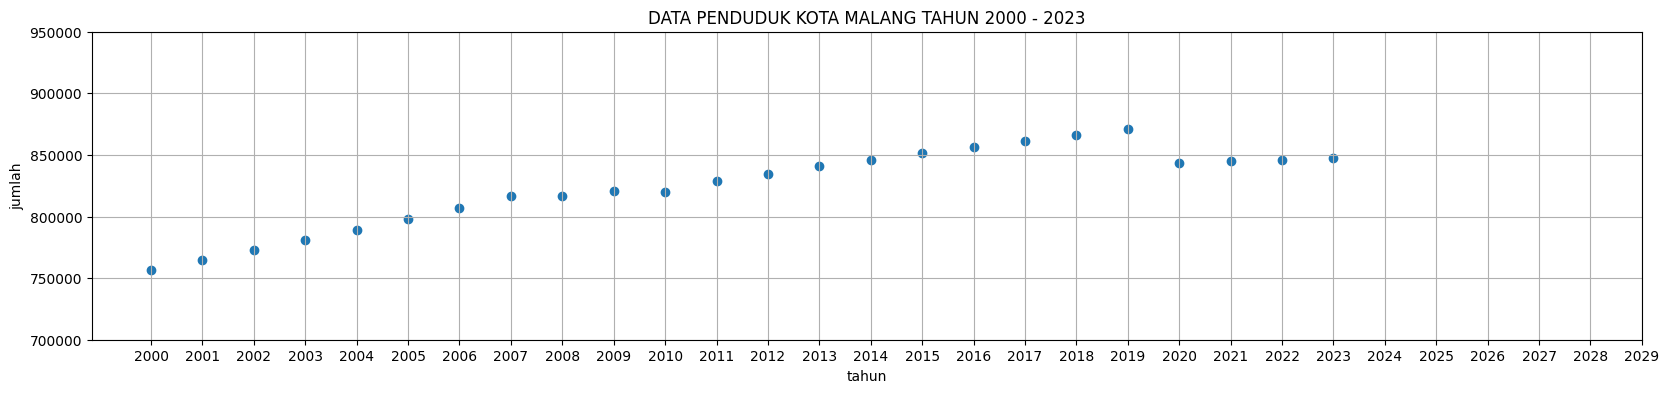

In [5]:
plt.figure(figsize=(20,4))
plt.title('DATA PENDUDUK KOTA MALANG TAHUN 2000 - 2023')
plt.scatter(x=dp_km['Tahun'],y=dp_km['Jumlah'])
plt.yticks(np.array(range(700000,1000000,50000)))
plt.xticks(np.array(range(2000,2030)))
plt.xlabel('tahun')
plt.ylabel('jumlah')
plt.grid()

## Independen variable

Variabel independen (juga dikenal sebagai prediktor, fitur, atau explanatory variable) adalah variabel yang digunakan untuk memprediksi atau menjelaskan variabel lain. Dalam model regresi atau analisis statistik lainnya, variabel independen dianggap sebagai input atau faktor yang mempengaruhi variabel dependen.

In [8]:
x = dp_km.iloc[:,[0]].values # jumlah penduduk


# Dependen variable

Variabel dependen (juga dikenal sebagai response, target, atau outcome variable) adalah variabel yang diprediksi atau dijelaskan oleh variabel independen. Variabel ini dianggap sebagai output atau hasil yang dipengaruhi oleh perubahan dalam variabel independen.

In [7]:
y = dp_km.iloc[:,[1]].values # tahun

## split test trining

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## Training regresi dan predisksi

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg=LinearRegression()

In [12]:
reg.fit(x_train,y_train)

LinearRegression()

In [13]:
intercept = reg.intercept_
print("Intercept:", intercept)

Intercept: [-8185027.71129542]


In [14]:
slope = reg.coef_
print("Slope :", slope)

Slope : [[4479.88507109]]


In [17]:
y_predict = reg.predict(x_test)
y_predict

array([[824021.16666667],
       [819541.28159558],
       [873299.90244866],
       [837460.82187994],
       [864340.13230648],
       [779222.31595577]])

In [18]:
from sklearn.metrics import mean_absolute_error,r2_score


In [19]:
print('MAE :', mean_absolute_error(y_test,y_predict))
print('R2 :', r2_score(y_test,y_predict))

MAE : 12654.346761453276
R2 : 0.7019594780435011


- `mean_absolute_error(y_test, y_predict)` menghitung Mean Absolute Error (MAE) antara nilai sebenarnya dan nilai prediksi.

- `r2_score(y_test, y_predict)` menghitung R-squared (R2) yang mengukur seberapa baik regresi linear menjelaskan variasi dalam data.

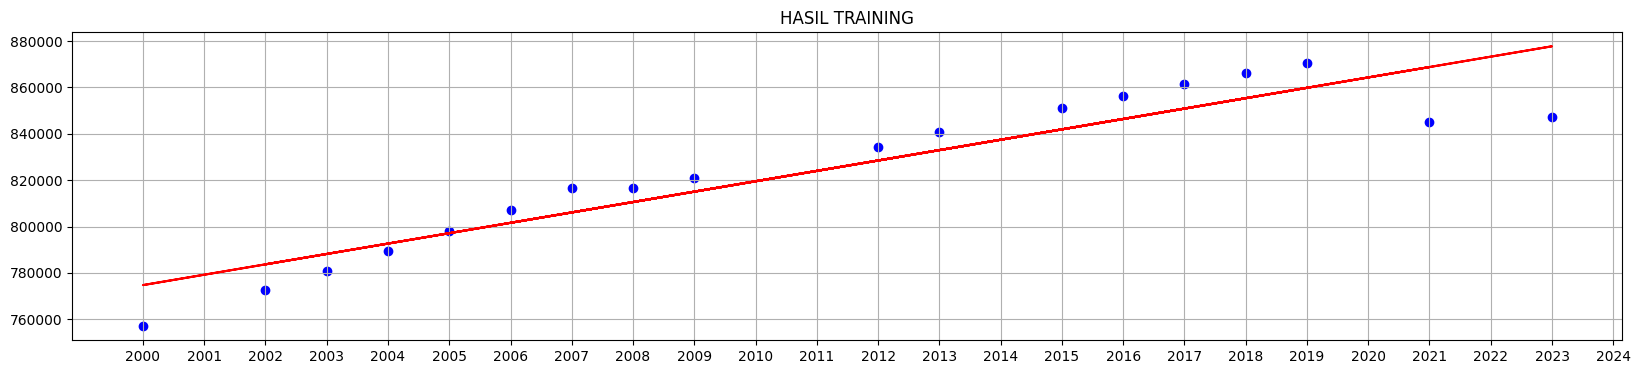

In [20]:
plt.figure(figsize=(20,4))
plt.title('HASIL TRAINING')
plt.scatter(x_train,y_train,c='blue')
plt.xticks(np.array(range(2000,2030)))
plt.plot(x_train,reg.predict(x_train),c='red')
plt.grid()

In [21]:
dp_pred = pd.read_excel('data/data prediksi.xlsx')
dp_pred

,tahun
0,2024
1,2025
2,2026


In [22]:
prediksi_baru = reg.predict(dp_pred)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


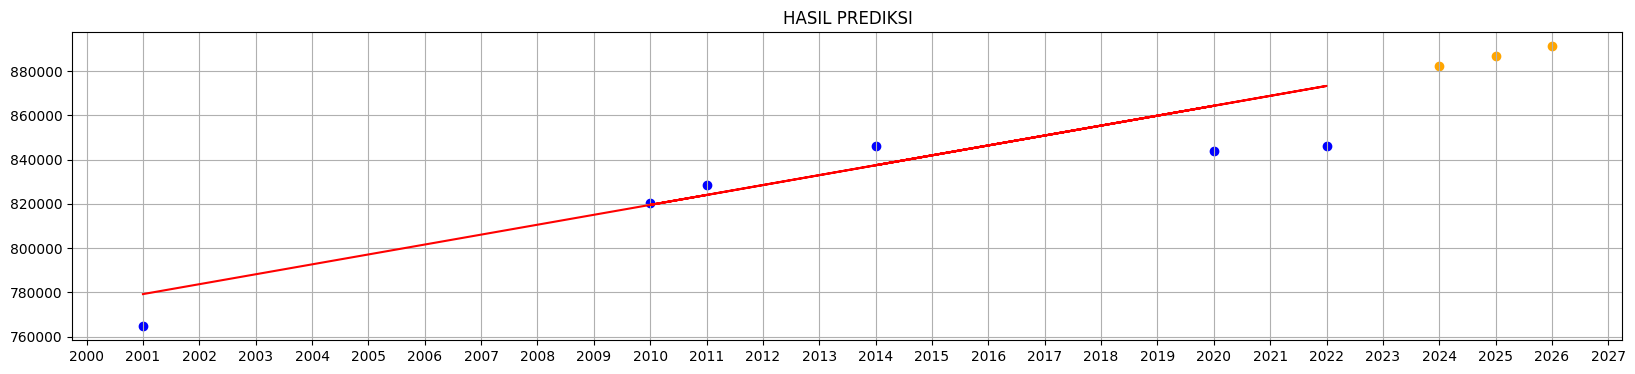

In [23]:
plt.figure(figsize=(20,4))
plt.title('HASIL PREDIKSI')
plt.scatter(x_test,y_test,c='blue')
plt.plot(x_test,y_predict,c='red')
plt.xticks(np.array(range(2000,2030)))
plt.scatter(dp_pred,prediksi_baru,c='orange')

plt.grid()